결과 데이터가 3개 → 0, 1, 2 <br>
다중 분류<br>
손실함수 : categorical_crossentropy<br>
출력층의 활성화 함수 : softmax<br>
출력층의 노드의 개수 : 결과 데이터의 종류 수<br>

In [ ]:
# 코랩 그래프 한글 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 후 런타임 다시 시작

In [1]:
import pandas as pd

In [2]:
# 데이터 가져오기
df = pd.read_csv('https://raw.githubusercontent.com/leo-contigo/DeepLearning/main/data/iris.csv', header=None)
df.columns = ['꽃받침길이', '꽃받침너비', '꽃잎길이', '꽃잎너비', '품종']
df.head()

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 상관도 그래프

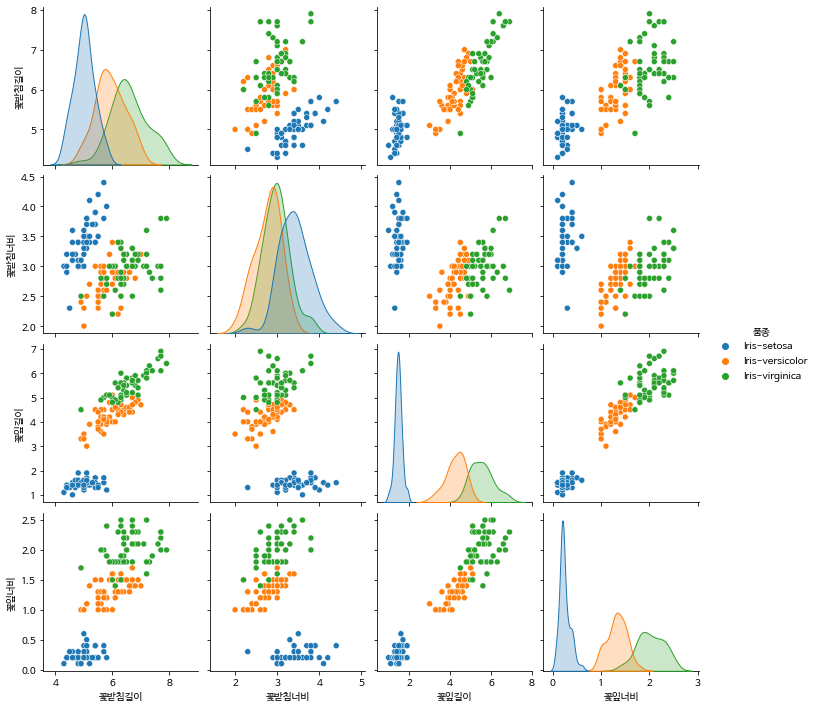

In [3]:
# seaborn 을 이용해 전체 상관도 확인

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font' , family='NanumBarunGothic')

sns.pairplot(df, hue = '품종')
plt.show();

In [9]:
df.info()
df.isna().sum()

# 품종 컬럼 문자열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃받침길이   150 non-null    float64
 1   꽃받침너비   150 non-null    float64
 2   꽃잎길이    150 non-null    float64
 3   꽃잎너비    150 non-null    float64
 4   품종      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


꽃받침길이    0
꽃받침너비    0
꽃잎길이     0
꽃잎너비     0
품종       0
dtype: int64

In [8]:
# 학습, 결과 데이터 분류하기
X = df.drop(['품종'], axis=1)
y = df['품종']

display(X)
display(y)

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: 품종, Length: 150, dtype: object

# 원핫 인코딩

- get_dummies() 함수 사용

In [25]:
# 딥러닝 학습에는 문자를 모두 숫자로 바꿔야함.
# 원-핫 인코딩 : get_dummies() 함수 사용
# 여러 개의 값으로 된 무자열을 0과 1로만 이루어진 형태로 만드는 과정.

y = pd.get_dummies(y)
y.info()

# 원핫인코딩 결과
y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Iris-setosa      150 non-null    uint8
 1   Iris-versicolor  150 non-null    uint8
 2   Iris-virginica   150 non-null    uint8
dtypes: uint8(3)
memory usage: 578.0 bytes


,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [29]:
print(X.shape)
imput_size = X.shape[1]
imput_size # input_dim 값으로 들어감
# input_dim = 꽃받침길이	꽃받침너비	꽃잎길이	꽃잎너비 총 4개

(150, 4)


4

In [32]:
len(y.value_counts())
out_nodes = len(y.value_counts()) # 출력층

# 소프트 맥스 : softmax

In [37]:
# 모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 신경망 설계
model = Sequential()

# 은닉층
# input_dim = 꽃받침길이	꽃받침너비	꽃잎길이	꽃잎너비 총 4개
model.add(Dense(12, input_dim = imput_size, activation = 'relu'))

# 활성화 기준 activation = 활성화 함수 
model.add(Dense(8, activation = 'relu'))

# 출력층
model.add(Dense(out_nodes, activation = 'softmax'))
model.summary()

# 모델 컴파일
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 12)                60        
                                                                 
 dense_33 (Dense)            (None, 8)                 104       
                                                                 
 dense_34 (Dense)            (None, 3)                 27        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 학습
# vervose 에 0을 넣어주면 학습시 출력을 수행하지 않아서 약간의 이득을 볼 수 있다.
# model.fit(X, y, epochs=50, batch_size = 5, verbose=0)

model.fit(X, y, epochs=50, batch_size=5)

Epoch 1/50
30/30 [==============================] - 1s 2ms/step - loss: 1.7465 - accuracy: 0.3333
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 1.3679 - accuracy: 0.3333
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 1.1778 - accuracy: 0.3333
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 1.0573 - accuracy: 0.3333
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 0.9817 - accuracy: 0.3333
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 0.9182 - accuracy: 0.4000
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8547 - accuracy: 0.6267
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7979 - accuracy: 0.6600
Epoch 9/50
30/30 [==============================] - 0s 1ms/step - loss: 0.7459 - accuracy: 0.6667
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.6667
Epoch 11/50
30/30 [

In [48]:
# 정확도 확인
# 모델의 최종 accuracy와 loss 값을 알 수 있음. 
# loss는 예측값과 실제값이 차이나는 정도를 나타내는 지표. 작을 수록 좋음.
model.evaluate(X, y)
a = model.evaluate(X, y)
print(f'손실률 : {round(a[0]*100, 2)}%')
print(f'정확도 : {round(a[1]*100, 2)}%')

5/5 [==============================] - 0s 6ms/step - loss: 0.1431 - accuracy: 0.9667
손실률 : 14.31%
정확도 : 96.67%


# 결과 
- 꽃의 너비와 길이를 담은 150개 데이터중 96% 의 정화도로 맞추었다는 의미.

- 측정된 정확도를 신뢰할 수 있는지???